Maya Asher, 2/23/24
# Processing the Santa Barbara Corpus of Spoken American English
The SBCSAE is a collection of time-aligned transcripts of audio files. Along with timestamps, the transcripts also include many non-alphabetic characters that denote different aspects of the speech. In this notebook, I will be processing and cleaning up the raw text so that I can easily search for and locate my target words in my later analysis. 
## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import nltk
from natsort import index_natsorted
%pprint

Pretty printing has been turned OFF


## Read in correct files
There are 43 TRN files that need to be imported from my folder. I've opened each, added the contents to the dictionary like {filename : text}, and then closed it. 

In [2]:
# put trn files into a dict
path = "/Users/mayaasher/data_science/Stance-Taking-in-Spontaneous-Speech/data/utf-16"
os.chdir(path)
txt_dict = {}
for file in os.listdir():
    if file.endswith(".trn"): 
        filename = file
        f = open(path+'/'+filename, 'r', encoding='utf-16-be') # have to specify utf-16 big-endian
        text = f.read()
        txt_dict[str(filename)] = str(text)
        f.close()

In [3]:
len(txt_dict)

43

In [4]:
txt_dict.keys() # all files here

dict_keys(['SBC034.trn', 'SBC008.trn', 'SBC009.trn', 'SBC035.trn', 'SBC023.trn', 'SBC037.trn', 'SBC036.trn', 'SBC022.trn', 'SBC032.trn', 'SBC033.trn', 'SBC019.trn', 'SBC031.trn', 'SBC024.trn', 'SBC018.trn', 'SBC057.trn', 'SBC043.trn', 'SBC042.trn', 'SBC056.trn', 'SBC045.trn', 'SBC051.trn', 'SBC050.trn', 'SBC044.trn', 'SBC047.trn', 'SBC049.trn', 'SBC048.trn', 'SBC060.trn', 'SBC058.trn', 'SBC059.trn', 'SBC015.trn', 'SBC001.trn', 'SBC029.trn', 'SBC014.trn', 'SBC002.trn', 'SBC016.trn', 'SBC017.trn', 'SBC003.trn', 'SBC007.trn', 'SBC013.trn', 'SBC006.trn', 'SBC010.trn', 'SBC004.trn', 'SBC005.trn', 'SBC011.trn'])

In [5]:
txt_dict['SBC034.trn'][:500] # text data 

"\ufeff0.000\t4.475\t>ENV:\t((DOOR_OPENING_AND_CLOSING))\n4.475\t5.077\tKAREN:\tHi sweetie.\n5.077\t5.908\tSCOTT:\t... Hey.\n5.908\t6.489\t\t.. (THROAT)\n6.489\t7.630\tKAREN:\t<X Sweetie frumptions X>.\n7.630\t10.399\t\t... This is kinda open.\n10.399\t11.071\tSCOTT:\t... Yep.\n11.071\t12.008\t\t... How was work?\n12.008\t13.158\t>ENV:\t((CLOSET))\n13.158\t13.889\tKAREN:\tI'm so tired.\n13.889\t15.155\tSCOTT:\t... Ti=red.\n15.155\t15.743\tKAREN:\tIt was % --\n15.743\t16.277\t\tIt was okay,\n16.277\t16.939\t\tI left my bag there.\n16.939\t17.809\t\t... <VOX I "

## Dictionary -> DF
The dictionary contains the raw text for each file, so I've put it into a pandas data frame for easier access.

In [6]:
df = pd.DataFrame(list(txt_dict.items()))
df.columns = ["Filename", "Text"]
df.head()

,Filename,Text
0,SBC034.trn,﻿0.000\t4.475\t>ENV:\t((DOOR_OPENING_AND_CLOSI...
1,SBC008.trn,﻿0.00 3.40\t>ENV: \t((DOOR_OPENS)) <<TALK\n3...
2,SBC009.trn,﻿0.00 13.16\tNATHAN: \t... (H) Am I doing that...
3,SBC035.trn,"﻿0.000\t1.020\tPATTY:\t[It's not that bad,\n0...."
4,SBC023.trn,﻿1.506\t4.132\tEVELYN:\tAnother thing I though...


## Pre-tokenizing
Before tokenizing, I've removed a few choice chars that are usually placed in the middle of words in the transcripts. In doing this, the tokenizer can keep the full words together rather than breaking them up into small clusters of letters.

In [7]:
df["Text"] = df.Text.map(lambda x: x.replace('=',''))
df["Text"] = df.Text.map(lambda x: x.replace('[',''))
df["Text"] = df.Text.map(lambda x: x.replace(']',''))
df["Text"] = df.Text.map(lambda x: x.replace(r'\d',''))

In [8]:
df.head()

,Filename,Text
0,SBC034.trn,﻿0.000\t4.475\t>ENV:\t((DOOR_OPENING_AND_CLOSI...
1,SBC008.trn,﻿0.00 3.40\t>ENV: \t((DOOR_OPENS)) <<TALK\n3...
2,SBC009.trn,﻿0.00 13.16\tNATHAN: \t... (H) Am I doing that...
3,SBC035.trn,"﻿0.000\t1.020\tPATTY:\tIt's not that bad,\n0.0..."
4,SBC023.trn,﻿1.506\t4.132\tEVELYN:\tAnother thing I though...


## Tokenize and clean up data
1) NLTK tokenize text
2) Get rid of chars that are non-alphabetic, all upper case, and in `to_remove` (which includes all the alphabetic chars that aren't actual words – found in `removals`)
3) Re-order rows
### 1. Tokenize

In [9]:
df['Tokens'] = df.Text.map(nltk.word_tokenize)
df.head()

,Filename,Text,Tokens
0,SBC034.trn,﻿0.000\t4.475\t>ENV:\t((DOOR_OPENING_AND_CLOSI...,"[﻿0.000, 4.475, >, ENV, :, (, (, DOOR_OPENING_..."
1,SBC008.trn,﻿0.00 3.40\t>ENV: \t((DOOR_OPENS)) <<TALK\n3...,"[﻿0.00, 3.40, >, ENV, :, (, (, DOOR_OPENS, ), ..."
2,SBC009.trn,﻿0.00 13.16\tNATHAN: \t... (H) Am I doing that...,"[﻿0.00, 13.16, NATHAN, :, ..., (, H, ), Am, I,..."
3,SBC035.trn,"﻿0.000\t1.020\tPATTY:\tIt's not that bad,\n0.0...","[﻿0.000, 1.020, PATTY, :, It, 's, not, that, b..."
4,SBC023.trn,﻿1.506\t4.132\tEVELYN:\tAnother thing I though...,"[﻿1.506, 4.132, EVELYN, :, Another, thing, I, ..."


### The specific things we want to remove

In [10]:
f = open("/Users/mayaasher/data_science/metadata/annotations.txt", "r")
removals = f.read()
f.close()

In [11]:
print(removals) # the specific chars we want to remove

Santa Barbara Corpus of Spoken American English Part-II

  

Units 
    Intonation Unit			RETURN 
    Truncated intonation unit		-- 
    word				SPACE 
    truncated word			_ 

Speakers 
    Speaker identity/turn start		: 
    Speech overlap			[ ] 

Transitional Continuity 
    Final				. 
    Continuing				, 
    Appeal				? 

Terminal Pitch Direction 
    Fall				\ 
    Rise				/ 
    Level				- 

Accent and Lengthening 
    Primary accent			^ 
    Secondary accent			' 
    Booster				! 
    Lengthening				= 

Tone 
    Fall				\ 
    Rise				/ 
    Fall-rise				\/ 
    Rise-fall				/\ 
    Level				- 

Pause 
    Long				...(N) 
    Medium				... 
    Short				.. 
    Latching				(0) 

Vocal Noises 
    Vocal noises			( ) 
    Inhalation				(H) 
    Exhalation				(Hx) 
    Glottal stop			% 
    Laughter				@ 

Quality 
    Quality				<Y  Y> 
    Laugh quality			<@  @> 
    Quotation quality			<Q  Q> 
    Multiple quality features		<Y  <Z  Z>  Y> 

Phonetics 
    Phonetic transcripti

### 2. The removal

In [12]:
to_remove = ['N', 'H', 'Hx', 'Y', 'Q', 'Z', 'X', 'L2', 'G']

In [13]:
def clean(ls):
    return [item.lower() for item in ls if item.isalpha() and not item.isupper() and item not in to_remove]

In [14]:
df["Clean"] = df.Tokens.apply(clean)
df.head()

,Filename,Text,Tokens,Clean
0,SBC034.trn,﻿0.000\t4.475\t>ENV:\t((DOOR_OPENING_AND_CLOSI...,"[﻿0.000, 4.475, >, ENV, :, (, (, DOOR_OPENING_...","[hi, sweetie, hey, sweetie, frumptions, this, ..."
1,SBC008.trn,﻿0.00 3.40\t>ENV: \t((DOOR_OPENS)) <<TALK\n3...,"[﻿0.00, 3.40, >, ENV, :, (, (, DOOR_OPENS, ), ...","[okay, um, the, the, way, that, your, testimon..."
2,SBC009.trn,﻿0.00 13.16\tNATHAN: \t... (H) Am I doing that...,"[﻿0.00, 13.16, NATHAN, :, ..., (, H, ), Am, I,...","[am, doing, that, right, so, far, mhm, all, th..."
3,SBC035.trn,"﻿0.000\t1.020\tPATTY:\tIt's not that bad,\n0.0...","[﻿0.000, 1.020, PATTY, :, It, 's, not, that, b...","[it, not, that, bad, something, else, or, do, ..."
4,SBC023.trn,﻿1.506\t4.132\tEVELYN:\tAnother thing I though...,"[﻿1.506, 4.132, EVELYN, :, Another, thing, I, ...","[another, thing, thought, was, interesting, wa..."


### 3. Re-ordering rows

In [15]:
# sorts filenames for convenience
df = df.sort_values(
    by="Filename",
    key=lambda x: np.argsort(index_natsorted(df["Filename"])))
df.head()

,Filename,Text,Tokens,Clean
29,SBC001.trn,﻿0.00 9.21\tLENORE: \t... So you don't need to...,"[﻿0.00, 9.21, LENORE, :, ..., So, you, do, n't...","[so, you, do, need, to, go, borrow, equipment,..."
32,SBC002.trn,﻿0.00 6.52\tJAMIE: \tHow can you teach a thre...,"[﻿0.00, 6.52, JAMIE, :, How, can, you, teach, ...","[how, can, you, teach, a, to, tap, ca, imagine..."
35,SBC003.trn,﻿0.00 1.01\tMARILYN: \t(Hx) Okay.\n0.30 1.65\t...,"[﻿0.00, 1.01, MARILYN, :, (, Hx, ), Okay, ., 0...","[okay, do, you, have, a, particular, um, use, ..."
40,SBC004.trn,﻿0.00 1.07\tPAM: \t.. Juice 2anybody2?\n0.4...,"[﻿0.00, 1.07, PAM, :, .., Juice, 2anybody2, ?,...","[juice, like, for, a, little, while, you, go, ..."
41,SBC005.trn,"﻿0.00 3.46\tDARRYL: \tBut,\n3.46 6.71\t ...","[﻿0.00, 3.46, DARRYL, :, But, ,, 3.46, 6.71, ....","[but, but, to, try, and, and, talk, me, out, o..."


## Basic Stats
In this section, I've added lots of columns with token stats, including token count, TTR, and average word length. Since this is spontaneous speech, there aren't necessarily sentences, so I didn't analyze that. 

In [16]:
df.describe()

,Filename,Text,Tokens,Clean
count,43,43,43,43
unique,43,43,43,43
top,SBC001.trn,﻿0.00 9.21\tLENORE: \t... So you don't need to...,"[﻿0.00, 9.21, LENORE, :, ..., So, you, do, n't...","[so, you, do, need, to, go, borrow, equipment,..."
freq,1,1,1,1


In [17]:
def get_ttr(toks):
    lower = [w.lower() for w in toks]
    return len(set(lower))/len(lower)
def get_avg_word_length(toks):
    toklen_nosym = [len(w) for w in toks if w.isalnum()]
    return np.mean(toklen_nosym)

In [18]:
df['Token_count'] = df.Clean.map(len)
df['TTR'] = df.Clean.map(get_ttr)
df['Avg_word_len'] = df.Clean.map(get_avg_word_length)

In [19]:
df.head()

,Filename,Text,Tokens,Clean,Token_count,TTR,Avg_word_len
29,SBC001.trn,﻿0.00 9.21\tLENORE: \t... So you don't need to...,"[﻿0.00, 9.21, LENORE, :, ..., So, you, do, n't...","[so, you, do, need, to, go, borrow, equipment,...",4766,0.143097,3.777801
32,SBC002.trn,﻿0.00 6.52\tJAMIE: \tHow can you teach a thre...,"[﻿0.00, 6.52, JAMIE, :, How, can, you, teach, ...","[how, can, you, teach, a, to, tap, ca, imagine...",4173,0.187395,3.979631
35,SBC003.trn,﻿0.00 1.01\tMARILYN: \t(Hx) Okay.\n0.30 1.65\t...,"[﻿0.00, 1.01, MARILYN, :, (, Hx, ), Okay, ., 0...","[okay, do, you, have, a, particular, um, use, ...",4233,0.208835,3.965509
40,SBC004.trn,﻿0.00 1.07\tPAM: \t.. Juice 2anybody2?\n0.4...,"[﻿0.00, 1.07, PAM, :, .., Juice, 2anybody2, ?,...","[juice, like, for, a, little, while, you, go, ...",3788,0.195354,3.858237
41,SBC005.trn,"﻿0.00 3.46\tDARRYL: \tBut,\n3.46 6.71\t ...","[﻿0.00, 3.46, DARRYL, :, But, ,, 3.46, 6.71, ....","[but, but, to, try, and, and, talk, me, out, o...",2575,0.222913,3.987573


In [20]:
df.describe()

,Token_count,TTR,Avg_word_len
count,43.000000,43.000000,43.000000
mean,3780.720930,0.189910,3.832377
std,1142.478995,0.029888,0.115208
min,1673.000000,0.134072,3.602993
25%,2777.000000,0.170342,3.758178
50%,3847.000000,0.187395,3.816598
75%,4520.000000,0.209356,3.870632
max,6035.000000,0.253437,4.149758


The average word length overall was about 4 letters which feels oddly small. Perhaps since it's spontaneous speech people speak in shorter words as opposed to written text.

(array([ 1.,  5.,  6., 10., 11.,  1.,  3.,  4.,  1.,  1.]), array([3.60299296, 3.65766951, 3.71234606, 3.76702261, 3.82169916,
       3.87637571, 3.93105226, 3.98572881, 4.04040535, 4.0950819 ,
       4.14975845]), <BarContainer object of 10 artists>)

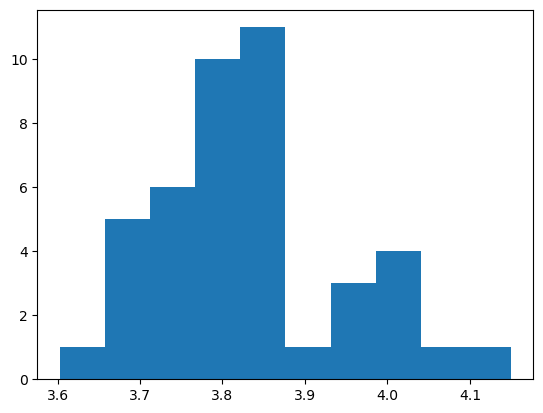

In [21]:
fig, ax = plt.subplots()
ax.hist(df.Avg_word_len)